In [9]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 打开HDF5文件并读取数据
file_name = './imap_part.h5'
with h5.File(file_name, 'r') as fp:
    # 打印文件中的所有键
    print(fp.keys())
    # 读取imap数据
    imap = fp['imap'][:]
    # 读取频率数据
    Freq = fp['freq'][:]
    # 读取右升角数据
    RA   = fp['ra'][:]
    # 读取 declination 数据
    Dec  = fp['dec'][:]

<KeysViewHDF5 ['dec', 'freq', 'imap', 'ra']>


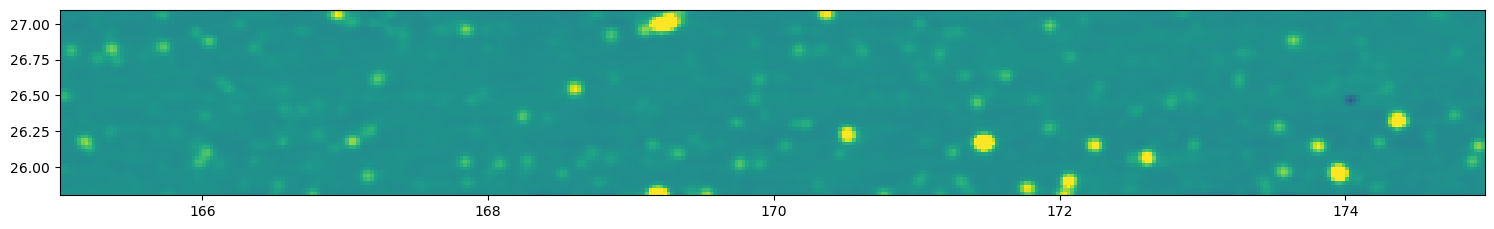

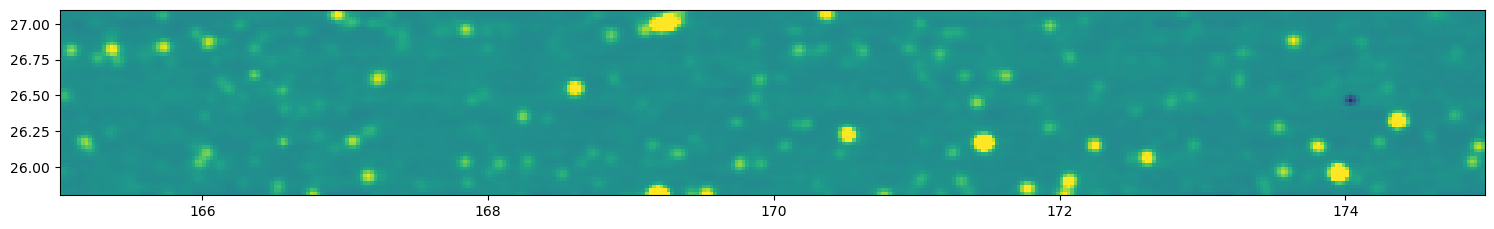

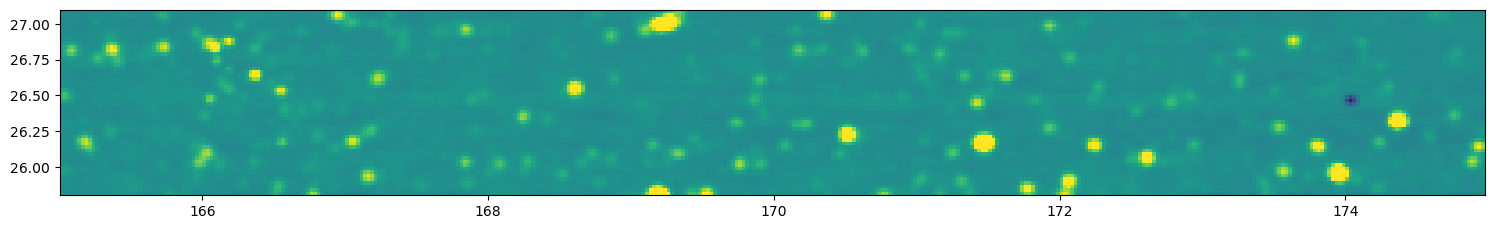

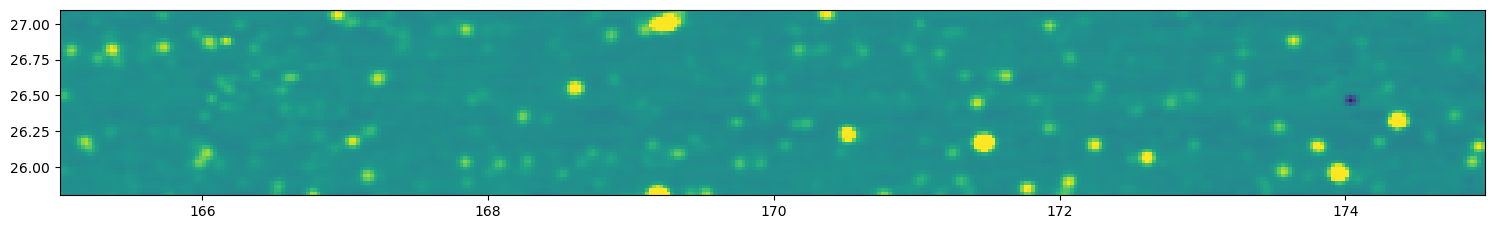

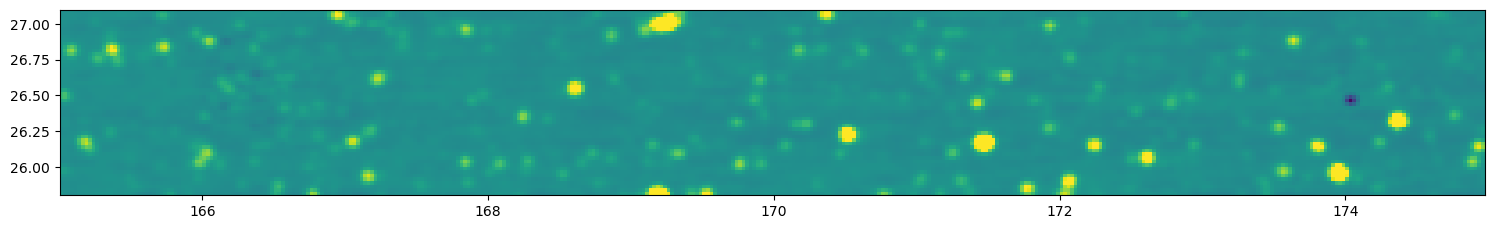

In [11]:

# 遍历从0到3000，以600为步长生成图像
for i in range(0, 3000, 600):
    # 创建一个新的图形，设置图形大小
    fig = plt.figure(figsize=(15, 4))
    # 添加坐标轴
    ax  = fig.add_axes([0.01, 0.1, 0.95, 0.8])
    # 绘制颜色网格
    ax.pcolormesh(RA, Dec, imap[:, :, i].T, vmax=1, vmin=-1)
    # 设置坐标轴的长宽比为相等
    ax.set_aspect('equal')

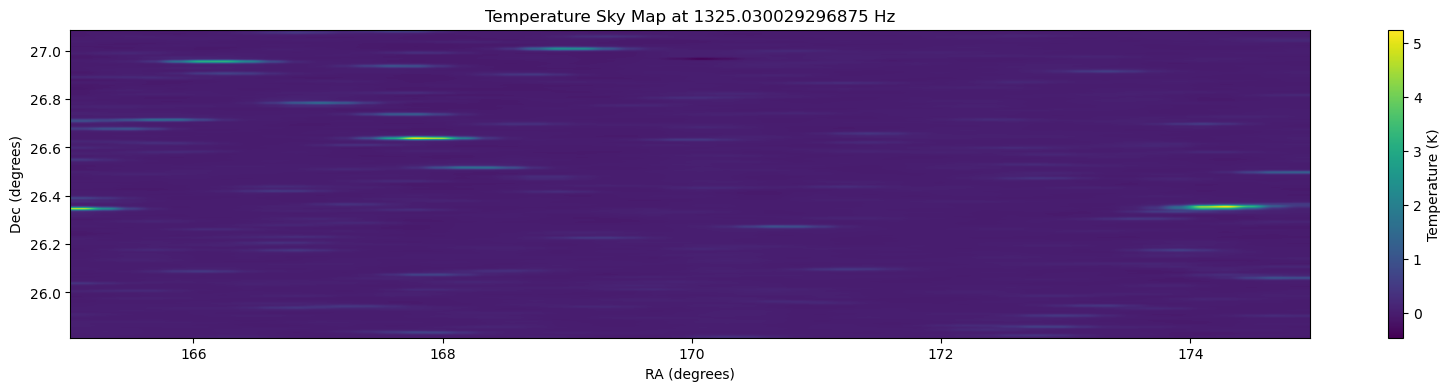

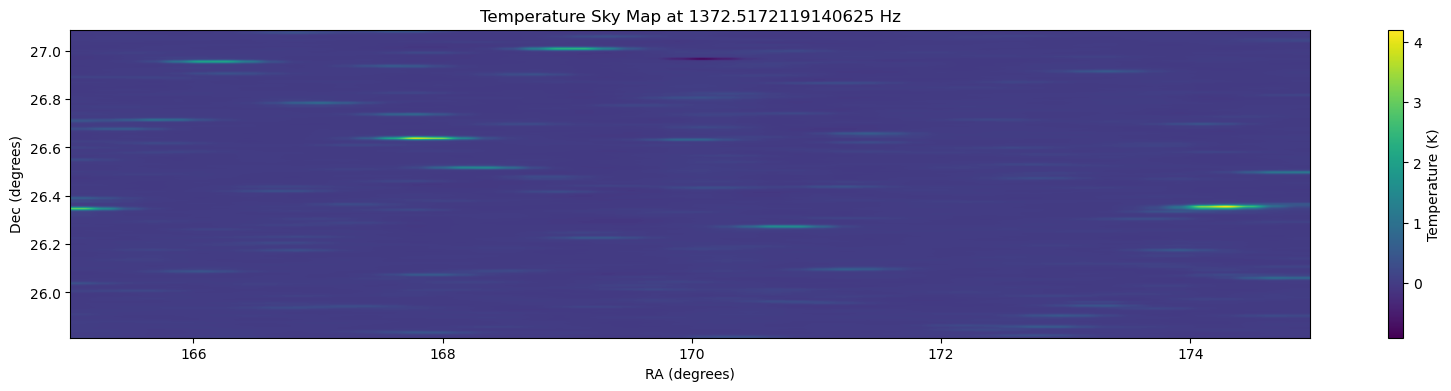

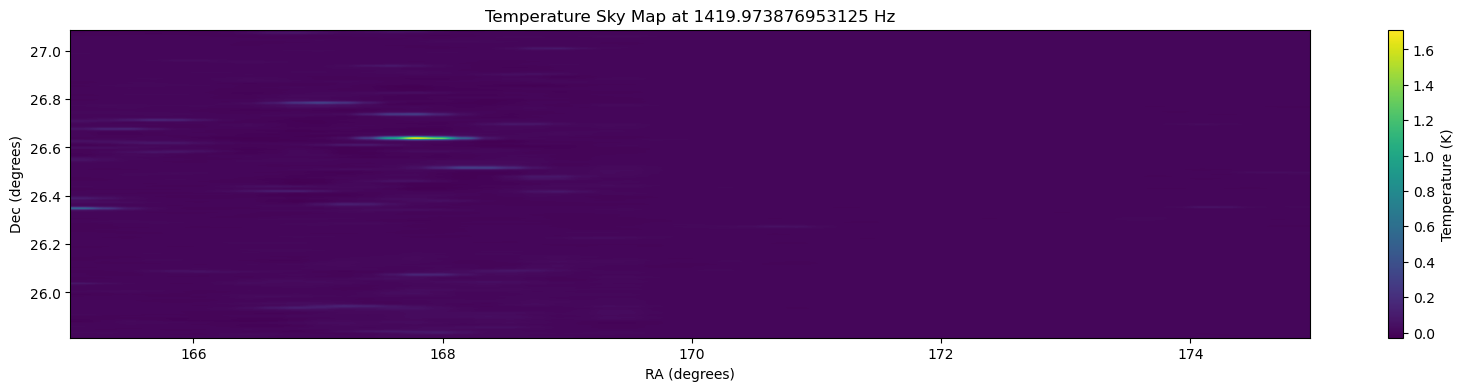

In [16]:
# 选择展示的频率索引，这里假设我们展示最小、中间和最大频率的天图
freq_indices = [0, len(Freq)//2, len(Freq)-1]

# 为每个选定的频率绘制天图
for index in freq_indices:
    plt.figure(figsize=(20, 4))
    plt.imshow(imap[:, :, index], aspect='auto', origin='lower', extent=[RA.min(), RA.max(), Dec.min(), Dec.max()])
    plt.colorbar(label='Temperature (K)')
    plt.title(f'Temperature Sky Map at {Freq[index]} Hz')
    plt.xlabel('RA (degrees)')
    plt.ylabel('Dec (degrees)')
    plt.show()


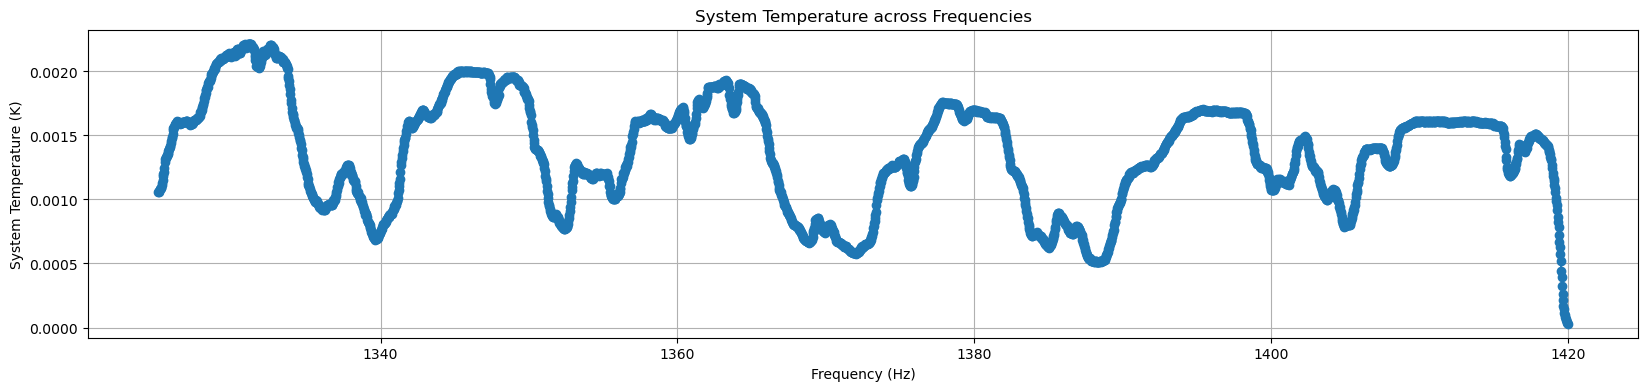

In [19]:
# 计算频率间隔 dν
d_nu = np.diff(Freq)  # 计算Freq数组的相邻差分
d_nu = np.append(d_nu, d_nu[-1])  # 将最后一个频率间隔用相同的值填充以匹配数组长度

# 假设 dt 为 1 (或者根据实际情况进行调整)
dt = 1

# 计算每个频率的系统温度
T_sys = []
for i in range(len(Freq)):
    sigma_squared = np.var(imap[:, :, i])  # 计算方差
    T_sys_value = sigma_squared * dt * d_nu[i]
    T_sys.append(T_sys_value)

# 可视化系统温度随频率的变化
plt.figure(figsize=(20, 4))
plt.plot(Freq, T_sys, marker='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('System Temperature (K)')
plt.title('System Temperature across Frequencies')
plt.grid(True)
plt.show()
